In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.patches import Patch
import sys
import numpy as np
import os

colori_matplotlib = [
    "r", "b", "g", "c", "m", "y", "k",
    "royalblue", "limegreen", "tomato", "deepskyblue", "darkorchid", "goldenrod", "dimgray",
    "dodgerblue", "springgreen", "salmon", "skyblue", "mediumorchid", "khaki", "lightgray",
    "cornflowerblue", "palegreen", "lightcoral", "lightcyan", "lightpink", "lightyellow", "silver",
    "steelblue", "springgreen", "lightsalmon", "powderblue", "mediumvioletred", "gold", "gainsboro",
    "cornflowerblue", "chartreuse", "darkorange", "cadetblue", "mediumslateblue", "darkkhaki", "beige",
    "mediumblue", "mediumseagreen", "crimson", "darkturquoise", "darkslategray", "olive", "floralwhite",
    "mediumslateblue", "chartreuse", "darkorange", "cadetblue", "mediumslateblue", "darkkhaki", "beige",
]

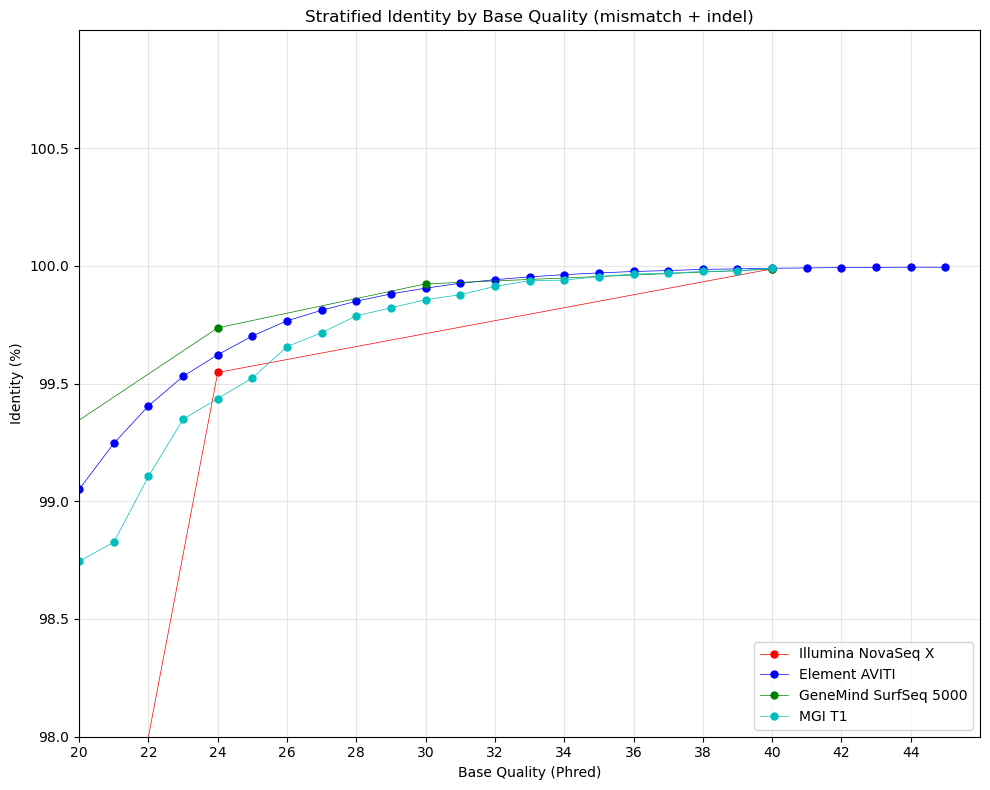

In [ ]:
#plot_identity_BQ_stratification.py

tsv_ILM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/ILLUMINA_NovaSeqX_WGS/NA12878_KAPA/IDENTITY_NA12878_NovaSeqX_KAPA_GIAB_basequal_strat.tsv.gz.stats"
tsv_ELM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/Element_WGS/RUN_4/IDENTITY_NA12878_Element_run4_GIAB_basequal_strat.tsv.gz.stats"
# tsv_GM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V1/IDENTITY_NA12878_GeneMind_GIAB_basequal_strat.tsv.gz.stats"
tsv_GM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V2/SnakeMake_Sequencing_Identity/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats"
# tsv_MGI = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/G400/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats"
tsv_MGI = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/T1/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats"

tsv_list = [tsv_ILM, tsv_ELM, tsv_GM, tsv_MGI]
    
label=["Illumina NovaSeq X", "Element AVITI", "GeneMind SurfSeq 5000", "MGI T1"]

fig, ax = plt.subplots(figsize=(10, 8))
for i in range(0, len(tsv_list)):
    dir = tsv_list[i]

    df = pd.read_csv(dir, sep="\t")
    df = df.dropna()
    # df["identity_filtered"] = df["identity_filtered"] * 100
    df["identity_with_ins_filtered"] = df["identity_with_ins_filtered"] * 100

    color = colori_matplotlib[(i) % len(colori_matplotlib)]
    # ax.plot(df['BaseQuality'], df['identity_filtered'], marker='o', color=color, label=label[i], linewidth=0.5, markersize=5)
    ax.plot(df['BaseQuality'], df['identity_with_ins_filtered'], marker='o', color=color, label=label[i], linewidth=0.5, markersize=5)

ax.set_title('Stratified Identity by Base Quality (mismatch + indel)')
ax.set_xlabel('Base Quality (Phred)')
ax.set_ylabel('Identity (%)')

ax.set_xticks(np.arange(0, max(df['BaseQuality']) + 1, 5))

# #y and x lim
# ax.set_yticks(np.arange(0, 105, 5))
# ax.set_xticks(np.arange(0, 45, 5))

#y and x lim
ax.set_yticks(np.arange(98, 101, 0.5))
ax.set_xticks(np.arange(20, 45, 2))
ax.set_ylim(98, 101)
ax.set_xlim(20, 46)


ax.grid(alpha=0.3)
ax.legend(loc="lower right")
plt.tight_layout()

/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/ILLUMINA_NovaSeqX_WGS/NA12878_KAPA/IDENTITY_NA12878_NovaSeqX_KAPA_GIAB_basequal_strat.tsv.gz.stats
/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/Element_WGS/RUN_4/IDENTITY_NA12878_Element_run4_GIAB_basequal_strat.tsv.gz.stats
/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V2/SnakeMake_Sequencing_Identity/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats
/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/T1/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats


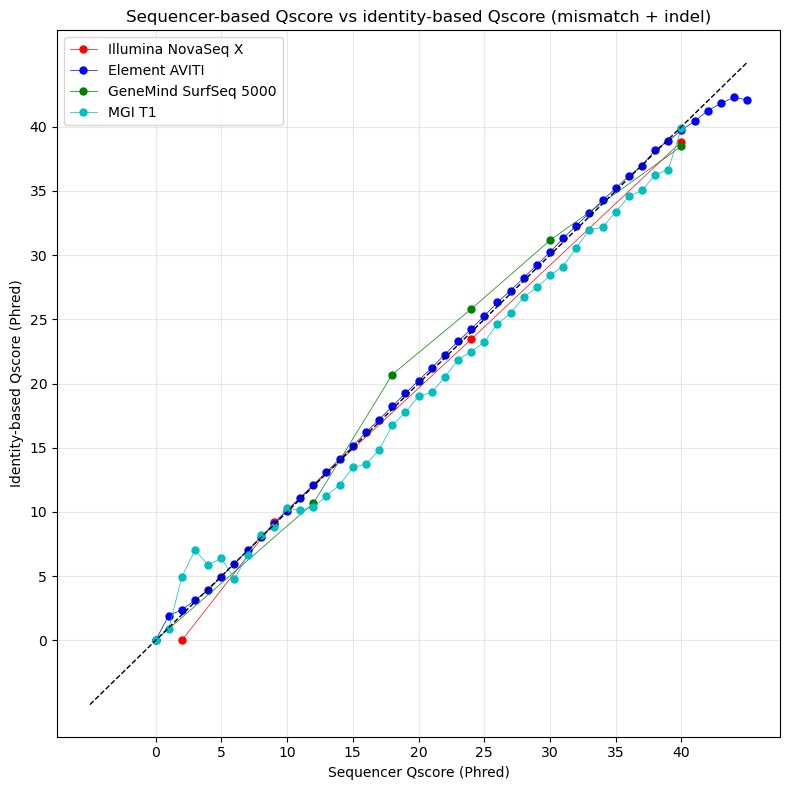

In [12]:
#plot_identity_BQ_stratifiction_Q_seq_to_real_Q.py

tsv_ILM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/ILLUMINA_NovaSeqX_WGS/NA12878_KAPA/IDENTITY_NA12878_NovaSeqX_KAPA_GIAB_basequal_strat.tsv.gz.stats"
tsv_ELM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/Element_WGS/RUN_4/IDENTITY_NA12878_Element_run4_GIAB_basequal_strat.tsv.gz.stats"
# tsv_GM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V1/IDENTITY_NA12878_GeneMind_GIAB_basequal_strat.tsv.gz.stats"
tsv_GM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V2/SnakeMake_Sequencing_Identity/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats"
# tsv_MGI = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/G400/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats"
tsv_MGI = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/T1/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats"

tsv_list = [tsv_ILM, tsv_ELM, tsv_GM, tsv_MGI]

label=["Illumina NovaSeq X", "Element AVITI", "GeneMind SurfSeq 5000", "MGI T1"]
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(len(tsv_list)):
    print(tsv_list[i])
    dir = tsv_list[i]

    df = pd.read_csv(dir, sep="\t")
    df = df.dropna()
    df["identity_with_ins_filtered"] = df["identity_with_ins_filtered"].apply(lambda x: -10*np.log10(1 - x))
    
    color = colori_matplotlib[(i) % len(colori_matplotlib)]
    ax.plot(df['BaseQuality'], df['identity_with_ins_filtered'], marker='o', color=color, label=label[i], linewidth=0.5, markersize=5)

ax.set_title('Sequencer-based Qscore vs identity-based Qscore (mismatch + indel)')
ax.set_xlabel('Sequencer Qscore (Phred)')
ax.set_ylabel('Identity-based Qscore (Phred)')

ax.set_xticks(np.arange(0, max(df['BaseQuality']) + 1, 5))
ax.set_yticks(np.arange(0, max(df['identity_with_ins_filtered']) + 1, 5))

ax.plot([-5, max(df['BaseQuality']) + 5], [-5, max(df['BaseQuality']) + 5], 'k--', linewidth=1)

ax.grid(alpha=0.3)
ax.legend()
plt.tight_layout()


/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/ILLUMINA_NovaSeqX_WGS/NA12878_KAPA/IDENTITY_NA12878_NovaSeqX_KAPA_GIAB_basequal_strat.tsv.gz.binned.stats
/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/Element_WGS/RUN_4/IDENTITY_NA12878_Element_run4_GIAB_basequal_strat.tsv.gz.binned.stats
/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V2/SnakeMake_Sequencing_Identity/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.binned.stats
/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/T1/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.binned.stats


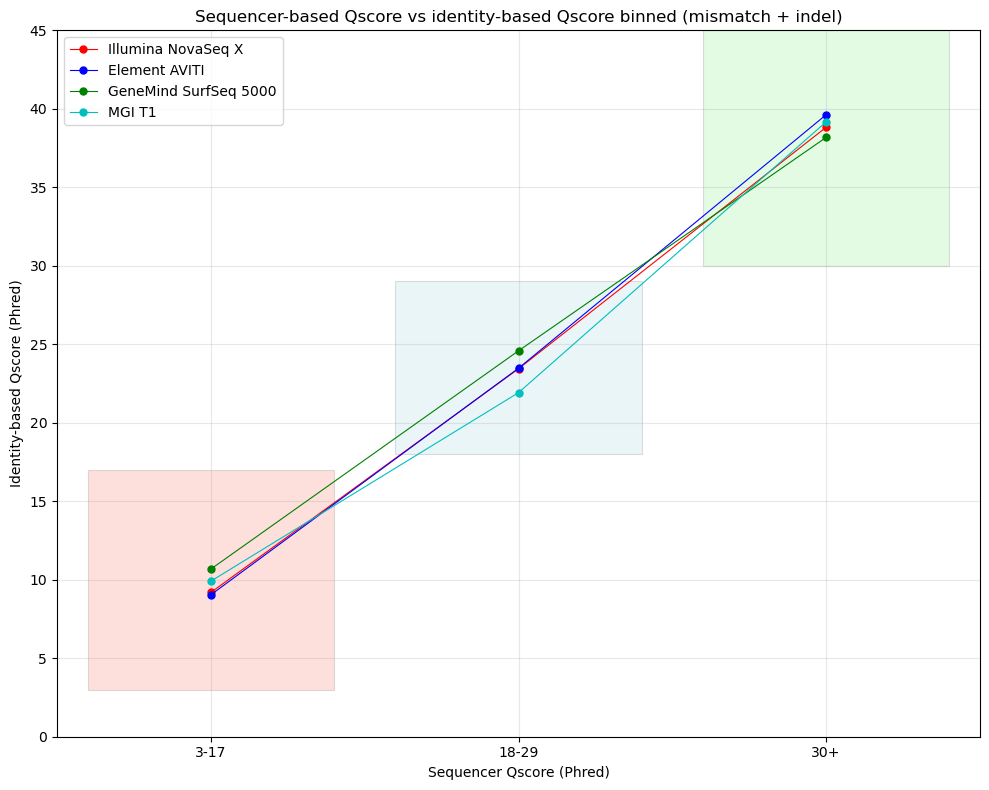

In [22]:
#plot_identity_BQ_stratifiction_binned_Q_seq_to_real_Q.py.py

tsv_ILM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/ILLUMINA_NovaSeqX_WGS/NA12878_KAPA/IDENTITY_NA12878_NovaSeqX_KAPA_GIAB_basequal_strat.tsv.gz.binned.stats"
tsv_ELM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/Element_WGS/RUN_4/IDENTITY_NA12878_Element_run4_GIAB_basequal_strat.tsv.gz.binned.stats"
# tsv_GM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V1/IDENTITY_NA12878_GeneMind_GIAB_basequal_strat.tsv.gz.binned.stats"
tsv_GM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V2/SnakeMake_Sequencing_Identity/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.binned.stats"
# tsv_MGI = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/G400/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.binned.stats"
tsv_MGI = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/T1/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.binned.stats"

tsv_list = [tsv_ILM, tsv_ELM, tsv_GM, tsv_MGI]

label=["Illumina NovaSeq X", "Element AVITI", "GeneMind SurfSeq 5000", "MGI T1"]

fig, ax = plt.subplots(figsize=(10, 8))

# ordine dei bin e loro range numerico
ordered_bins = ["3-17", "18-29", "30+"]
bin_ranges = {"3-17": (3, 17), "18-29": (18, 29), "30+": (30, 45)}  # range attesi per ciascun bin

# colori pastello chiari per i range (rettangoli)
range_colors = {
    "3-17": "salmon",
    "18-29": "lightblue",
    "30+": "lightgreen"
}

for i in range(len(tsv_list)):
    print(tsv_list[i])
    dir = tsv_list[i]
    df = pd.read_csv(dir, sep="\t")

    # converto in Phred
    df["identity_with_ins_filtered"] = df["identity_with_ins_filtered"].apply(lambda x: -10 * np.log10(1 - x))
    # print(tsv_list[i])
    # print(df["identity_with_ins_filtered"])
    df["BQ_bin"] = df["BQ_bin"].astype(str)

    # filtro e ordino
    df = df[df["BQ_bin"].isin(ordered_bins)]
    if df.empty:
        print(f"⚠️ Nessun bin valido in {dir}, skippo.")
        continue

    df["BQ_bin"] = pd.Categorical(df["BQ_bin"], categories=ordered_bins, ordered=True)
    color = colori_matplotlib[(i) % len(colori_matplotlib)]

    ax.plot(
        df['BQ_bin'],
        df['identity_with_ins_filtered'],
        marker='o',
        color=color,
        label=label[i],
        linewidth=0.8,
        markersize=5
    )

# --- Aggiunta dei quadrati colorati pastello ---
for i, b in enumerate(ordered_bins):
    y1, y2 = bin_ranges[b]
    ax.fill_between(
        [i - 0.4, i + 0.4],
        y1, y2,
        color=range_colors[b],
        alpha=0.25,
        zorder=0,
        edgecolor='gray',
        linewidth=0.8
    )

# sistemazione assi
ax.set_title('Sequencer-based Qscore vs identity-based Qscore binned (mismatch + indel)')
ax.set_xlabel('Sequencer Qscore (Phred)')
ax.set_ylabel('Identity-based Qscore (Phred)')

# asse X categoriale
ax.set_xticks(range(len(ordered_bins)))
ax.set_xticklabels(ordered_bins)

ax.set_ylim(0, 45)
ax.set_xlim(-0.5, len(ordered_bins) - 0.5)

# griglia e legenda
ax.grid(alpha=0.3)
ax.legend()

plt.tight_layout()
plt.savefig("identity_plot_binned_identity_with_ins_filtered_Q_seq_to_real_Q.png", dpi=300)
plt.show()


/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/ILLUMINA_NovaSeqX_WGS/NA12878_KAPA/IDENTITY_NA12878_NovaSeqX_KAPA_GIAB_basequal_strat.tsv.gz.stats.NEW.binned.stats
0    0.874625
1    0.995470
2    0.999869
Name: identity_with_ins_filtered, dtype: float64
/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/Element_WGS/RUN_4/IDENTITY_NA12878_Element_run4_GIAB_basequal_strat.tsv.gz.stats.NEW.binned.stats
0    0.894869
1    0.996513
2    0.999891
Name: identity_with_ins_filtered, dtype: float64
/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V2/SnakeMake_Sequencing_Identity/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats.NEW.binned.stats
0    0.883080
1    0.997365
2    0.999848
Name: identity_with_ins_filtered, dtype: float64
/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/T1/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats.N

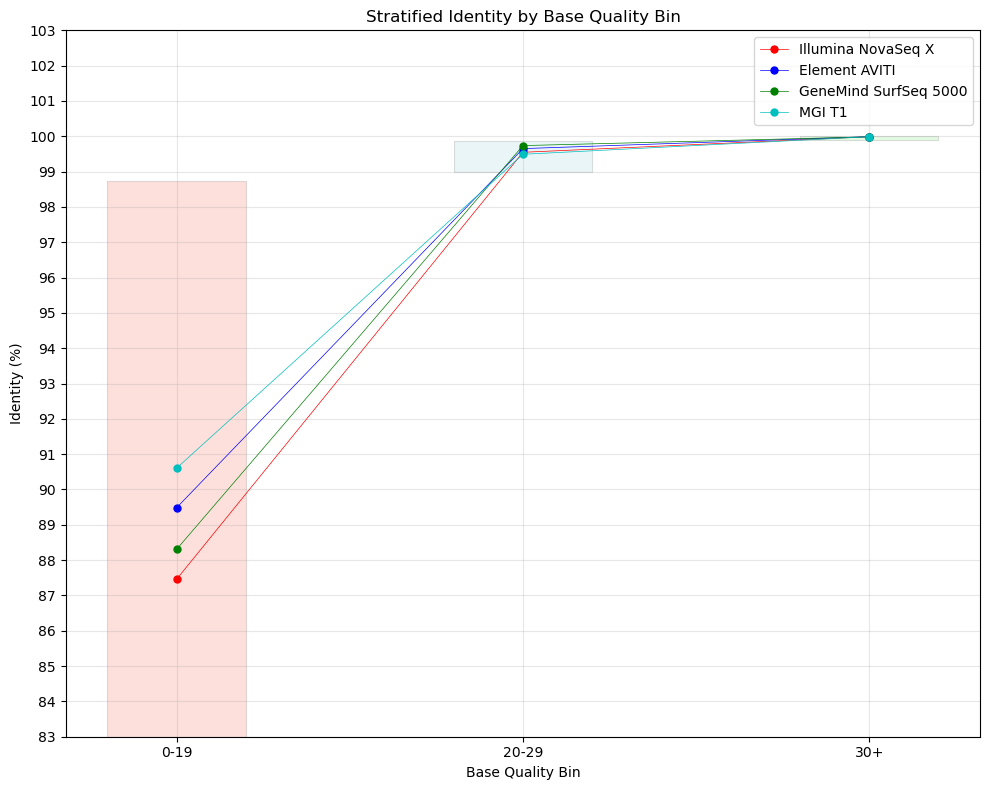

In [3]:
#plot_identity_BQ_stratifiction_binned.py nuovo binning

tsv_ILM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/ILLUMINA_NovaSeqX_WGS/NA12878_KAPA/IDENTITY_NA12878_NovaSeqX_KAPA_GIAB_basequal_strat.tsv.gz.stats.NEW.binned.stats"
tsv_ELM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/Element_WGS/RUN_4/IDENTITY_NA12878_Element_run4_GIAB_basequal_strat.tsv.gz.stats.NEW.binned.stats"
# tsv_GM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V1/IDENTITY_NA12878_GeneMind_GIAB_basequal_strat.tsv.gz.stats.NEW.binned.stats"
tsv_GM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V2/SnakeMake_Sequencing_Identity/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats.NEW.binned.stats"
# tsv_MGI = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/G400/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats.NEW.binned.stats"
tsv_MGI = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/T1/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats.NEW.binned.stats"

tsv_list = [tsv_ILM, tsv_ELM, tsv_GM, tsv_MGI]


label=["Illumina NovaSeq X", "Element AVITI", "GeneMind SurfSeq 5000", "MGI T1"]

# ordine dei bin e loro range numerico
ordered_bins = ["0-19", "20-29", "30+"]
bin_ranges = {"0-19": (0, 98.74), "20-29": (99, 99.87), "30+": (99.9, 100)}  # range attesi per ciascun bin
# colori pastello chiari per i range (rettangoli)
range_colors = {
    "0-19": "salmon",
    "20-29": "lightblue",
    "30+": "lightgreen"
}

fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(tsv_list)):
    dir = tsv_list[i]

    df = pd.read_csv(dir, sep="\t")
    print(tsv_list[i])
    print(df["identity_with_ins_filtered"])

    # converto in percentuale
    df["identity_with_ins_filtered"] = df["identity_with_ins_filtered"] * 100

    # imposto ordine dei bin (senza 0-2)
    ordered_bins = ["0-19", "20-29", "30+"]

    # forza BQ_bin a stringa
    df["BQ_bin"] = df["BQ_bin"].astype(str)

    # tieni solo i valori attesi
    df = df[df["BQ_bin"].isin(ordered_bins)]

    # assegna come categoria ordinata
    df["BQ_bin"] = pd.Categorical(df["BQ_bin"], categories=ordered_bins, ordered=True)

    # se non ci sono righe valide, passa oltre
    if df.empty:
        print(f"⚠️ Nessun bin valido trovato in {dir}, skippo.")
        continue

    color = colori_matplotlib[(i) % len(colori_matplotlib)]

    ax.plot(
        df['BQ_bin'],
        df['identity_with_ins_filtered'],
        marker='o',
        color=color,
        label=label[i],
        linewidth=0.5,
        markersize=5
    )

# --- Aggiunta dei quadrati colorati pastello ---
for i, b in enumerate(ordered_bins):
    y1, y2 = bin_ranges[b]
    ax.fill_between(
        [i - 0.2, i + 0.2],
        y1, y2,
        color=range_colors[b],
        alpha=0.25,
        zorder=0,
        edgecolor='gray',
        linewidth=0.8
    )

ax.set_title('Stratified Identity by Base Quality Bin')
ax.set_xlabel('Base Quality Bin')
ax.set_ylabel('Identity (%)')

ax.set_yticks(np.arange(0, 105, 1))
ax.set_ylim(83, 103)
ax.grid(alpha=0.3)
ax.legend()
plt.tight_layout()


/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/ILLUMINA_NovaSeqX_WGS/NA12878_KAPA/IDENTITY_NA12878_NovaSeqX_KAPA_GIAB_basequal_strat.tsv.gz.stats.NEW.binned.stats
0     9.017891
1    23.439018
2    38.827287
Name: identity_with_ins_filtered, dtype: float64
/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/Element_WGS/RUN_4/IDENTITY_NA12878_Element_run4_GIAB_basequal_strat.tsv.gz.stats.NEW.binned.stats
0     9.782692
1    24.575481
2    39.625735
Name: identity_with_ins_filtered, dtype: float64
/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V2/SnakeMake_Sequencing_Identity/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats.NEW.binned.stats
0     9.321112
1    25.792194
2    38.181564
Name: identity_with_ins_filtered, dtype: float64
/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/T1/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.g

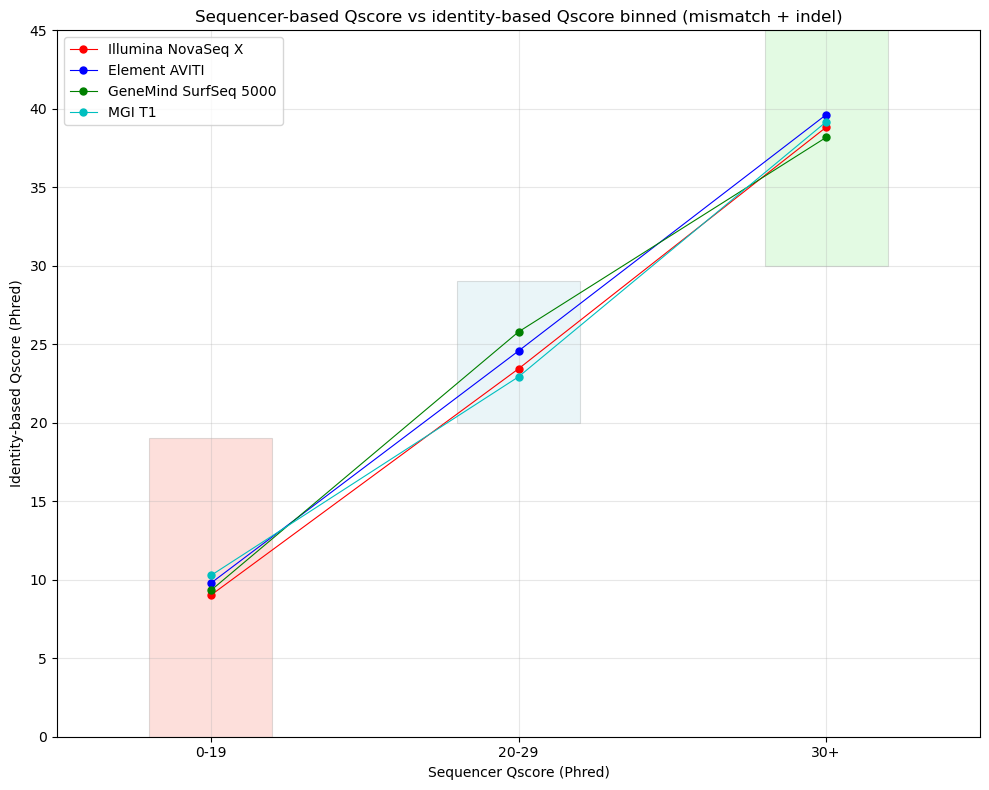

In [29]:
#plot_identity_BQ_stratifiction_binned_Q_seq_to_real_Q.py.py nuovo binning

tsv_ILM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/ILLUMINA_NovaSeqX_WGS/NA12878_KAPA/IDENTITY_NA12878_NovaSeqX_KAPA_GIAB_basequal_strat.tsv.gz.stats.NEW.binned.stats"
tsv_ELM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/Element_WGS/RUN_4/IDENTITY_NA12878_Element_run4_GIAB_basequal_strat.tsv.gz.stats.NEW.binned.stats"
# tsv_GM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/IDENTITY_NA12878_GeneMind_GIAB_basequal_strat.tsv.gz.stats.NEW.binned.stats"
tsv_GM = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V2/SnakeMake_Sequencing_Identity/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats.NEW.binned.stats"
# tsv_MGI = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/G400/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats.NEW.binned.stats"
tsv_MGI = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/T1/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_base_quality_stratification.tsv.gz.stats.NEW.binned.stats"

tsv_list = [tsv_ILM, tsv_ELM, tsv_GM, tsv_MGI]

label=["Illumina NovaSeq X", "Element AVITI", "GeneMind SurfSeq 5000", "MGI T1"]

fig, ax = plt.subplots(figsize=(10, 8))

# ordine dei bin e loro range numerico
ordered_bins = ["0-19", "20-29", "30+"]
bin_ranges = {"0-19": (0, 19), "20-29": (20, 29), "30+": (30, 45)}  # range attesi per ciascun bin

# colori pastello chiari per i range (rettangoli)
range_colors = {
    "0-19": "salmon",
    "20-29": "lightblue",
    "30+": "lightgreen"
}

for i in range(len(tsv_list)):
    dir = tsv_list[i]
    df = pd.read_csv(dir, sep="\t")

    # converto in Phred
    df["identity_with_ins_filtered"] = df["identity_with_ins_filtered"].apply(lambda x: -10 * np.log10(1 - x))
    print(tsv_list[i])
    print(df["identity_with_ins_filtered"])
    df["BQ_bin"] = df["BQ_bin"].astype(str)

    # filtro e ordino
    df = df[df["BQ_bin"].isin(ordered_bins)]
    if df.empty:
        print(f"⚠️ Nessun bin valido in {dir}, skippo.")
        continue

    df["BQ_bin"] = pd.Categorical(df["BQ_bin"], categories=ordered_bins, ordered=True)
    color = colori_matplotlib[(i) % len(colori_matplotlib)]

    ax.plot(
        df['BQ_bin'],
        df['identity_with_ins_filtered'],
        marker='o',
        color=color,
        label=label[i],
        linewidth=0.8,
        markersize=5
    )

# --- Aggiunta dei quadrati colorati pastello ---
for i, b in enumerate(ordered_bins):
    y1, y2 = bin_ranges[b]
    ax.fill_between(
        [i - 0.2, i + 0.2],
        y1, y2,
        color=range_colors[b],
        alpha=0.25,
        zorder=0,
        edgecolor='gray',
        linewidth=0.8
    )

# sistemazione assi
ax.set_title('Sequencer-based Qscore vs identity-based Qscore binned (mismatch + indel)')
ax.set_xlabel('Sequencer Qscore (Phred)')
ax.set_ylabel('Identity-based Qscore (Phred)')

# asse X categoriale
ax.set_xticks(range(len(ordered_bins)))
ax.set_xticklabels(ordered_bins)

ax.set_ylim(0, 45)
ax.set_xlim(-0.5, len(ordered_bins) - 0.5)

# griglia e legenda
ax.grid(alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()


Element AVITI


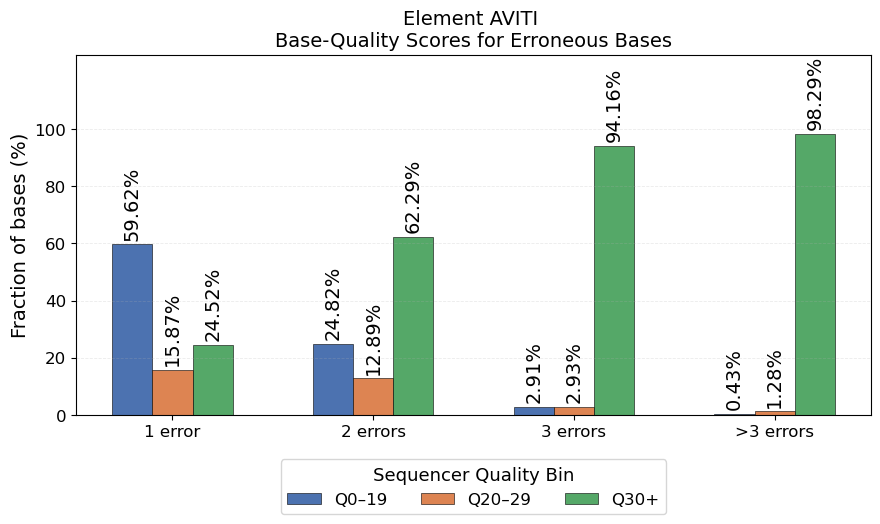

GeneMind SURFSeq 5000


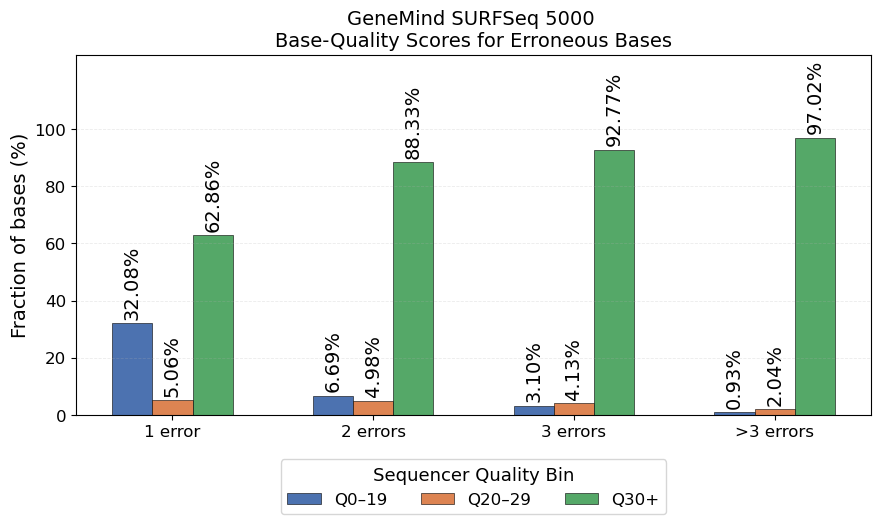

Illumina NovaSeq X


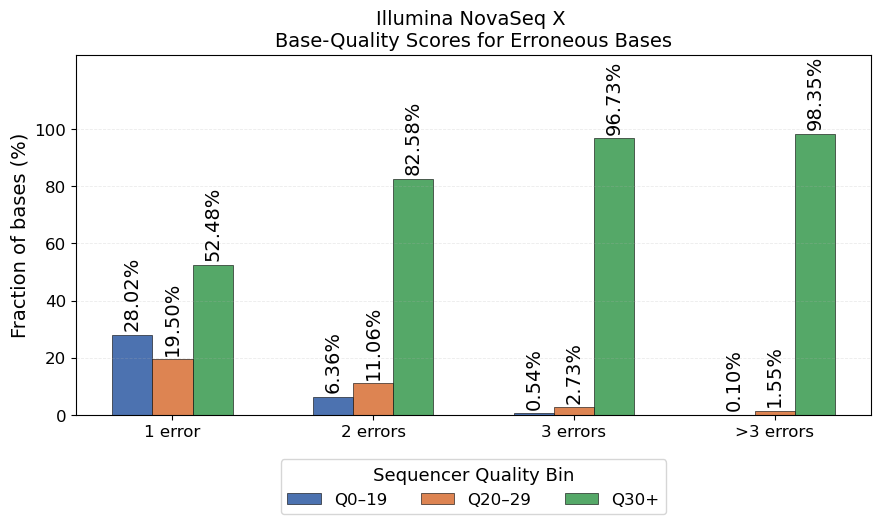

MGI T1


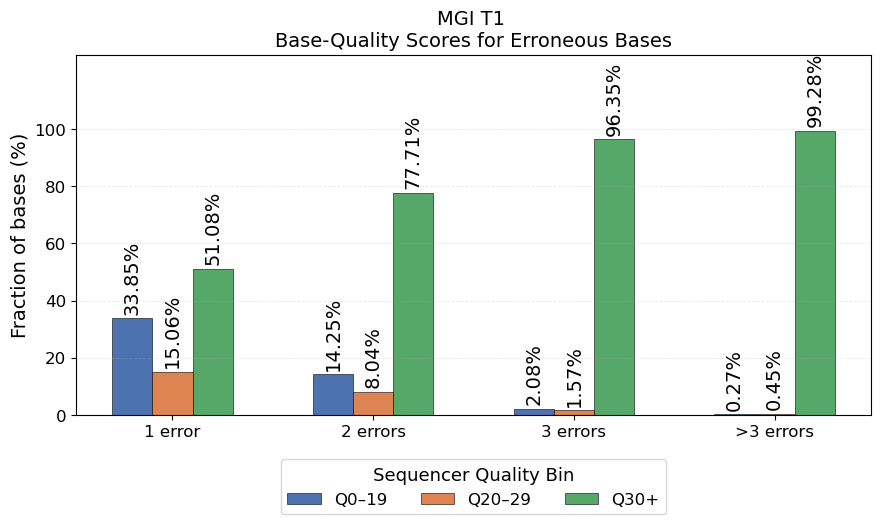

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "font.size": 13,
    "axes.titlesize": 15,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})

# ======================
# 1️⃣ LETTURA DATI
# ======================
df_path_elm = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/Element_WGS/RUN_4/IDENTITY_NA12878_Element_run4_GIAB_reads_Q30_up.tsv.gz.stats.base_distribution.tsv.gz"
df_path_gm = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V2/SnakeMake_Sequencing_Identity/NA12878_KAPA/IDENTITY_NA12878_KAPA_reads_30_up_LogOfMeans_all.tsv.gz.stats.base_distribution.tsv.gz"
df_path_ilm = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/ILLUMINA_NovaSeqX_WGS/NA12878_KAPA/IDENTITY_NA12878_NovaSeqX_KAPA_GIAB_reads_Q30_up_LogOfMeans.tsv.gz.stats.base_distribution.tsv.gz"
df_path_mgi = "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/T1/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_reads_30_up_LogOfMeans_all.tsv.gz.stats.base_distribution.tsv.gz"

df={
    "Element AVITI": pd.read_csv(df_path_elm, sep="\t", compression="gzip"),
    "GeneMind SURFSeq 5000": pd.read_csv(df_path_gm, sep="\t", compression="gzip"),
    "Illumina NovaSeq X": pd.read_csv(df_path_ilm, sep="\t", compression="gzip"),
    "MGI T1": pd.read_csv(df_path_mgi, sep="\t", compression="gzip")
}


for name, df in df.items():
    print(name)
    

    # Somma correct + error per classe
    df=df[(df["correct_or_error"]=="error") & (df["error_class"]!="0_errors")]
    # print(df)
    numeric_cols = df.select_dtypes(include="number").columns.tolist()
    df_grouped = df.groupby("error_class", as_index=False)[numeric_cols].sum()

    # Ordine classi
    order = ["0_errors", "1_error", "2_errors", "3_errors", "gt3_errors"]
    df_grouped["error_class"] = pd.Categorical(df_grouped["error_class"], categories=order, ordered=True)
    df_grouped.sort_values("error_class", inplace=True)
    # print(df_grouped)

    # Normalizza per 100%
    cols_norm = ["Q0_19", "Q20_29", "Q30plus"]
    row_sum = df_grouped[cols_norm].sum(axis=1).replace(0, 1)
    df_grouped[cols_norm] = df_grouped[cols_norm].div(row_sum, axis=0) * 100
    # print(df_grouped)

    # Labels
    bins = ["Q0_19", "Q20_29", "Q30plus"]
    colors = {"Q0_19": "#4C72B0", "Q20_29": "#DD8452", "Q30plus": "#55A868"}
    labels_pretty = {"Q0_19": "Q0–19", "Q20_29": "Q20–29", "Q30plus": "Q30+"}

    error_label_it = {
        "0_errors": "0 errors",
        "1_error": "1 error",
        "2_errors": "2 errors",
        "3_errors": "3 errors",
        "gt3_errors": ">3 errors",
    }

    # ======================
    # 2️⃣ CREAZIONE FIGURA
    # ======================
    fig, ax = plt.subplots(figsize=(9, 5.5))

    n_groups = len(df_grouped)
    x = np.arange(n_groups)
    bar_width = 0.20
    offsets = np.array([-bar_width, 0.0, bar_width])

    for i, col in enumerate(bins):
        vals = df_grouped[col].values
        bars = ax.bar(x + offsets[i], vals, width=bar_width,
                      color=colors[col],
                      label=labels_pretty[col],
                      edgecolor="black", linewidth=0.4)

        # Etichette percentuali sopra le barre
        for bar, val in zip(bars, vals):
            ax.text(bar.get_x() + bar.get_width()/2,
                    bar.get_height() + 1.5,
                    f"{val:.2f}%",
                    ha="center", va="bottom", fontsize=14, rotation=90)

    ax.set_xticks(x)
    ax.set_xticklabels([error_label_it[e] for e in df_grouped["error_class"]])

    ax.set_ylabel("Fraction of bases (%)")
    ax.set_ylim(0, 126)
    ax.set_yticks(np.arange(0, 110, 20))

    ax.set_title(f"{name} \nBase-Quality Scores for Erroneous Bases", fontsize=14)
    ax.grid(alpha=0.25, axis="y", linestyle="--", linewidth=0.6)


    # 🔥 Legenda sotto il grafico, centrata
    ax.legend(title="Sequencer Quality Bin", ncol=3,
              loc="upper center",
              bbox_to_anchor=(0.5, -0.10),
              frameon=True)

    plt.tight_layout()
    plt.show()


  error_class    Q0_19   Q20_29  Q30plus
0     1_error  4419967  1176330  1796617
1    2_errors   155180    80442   376330
2    3_errors     8690     8603   269693
3  gt3_errors     8540    24665  1884166
  error_class  Q0_19  Q20_29  Q30plus
0     1_error     99     265    21027
1    2_errors    133     195    13401
2    3_errors     46     175    12671
3  gt3_errors    334    1622   139604


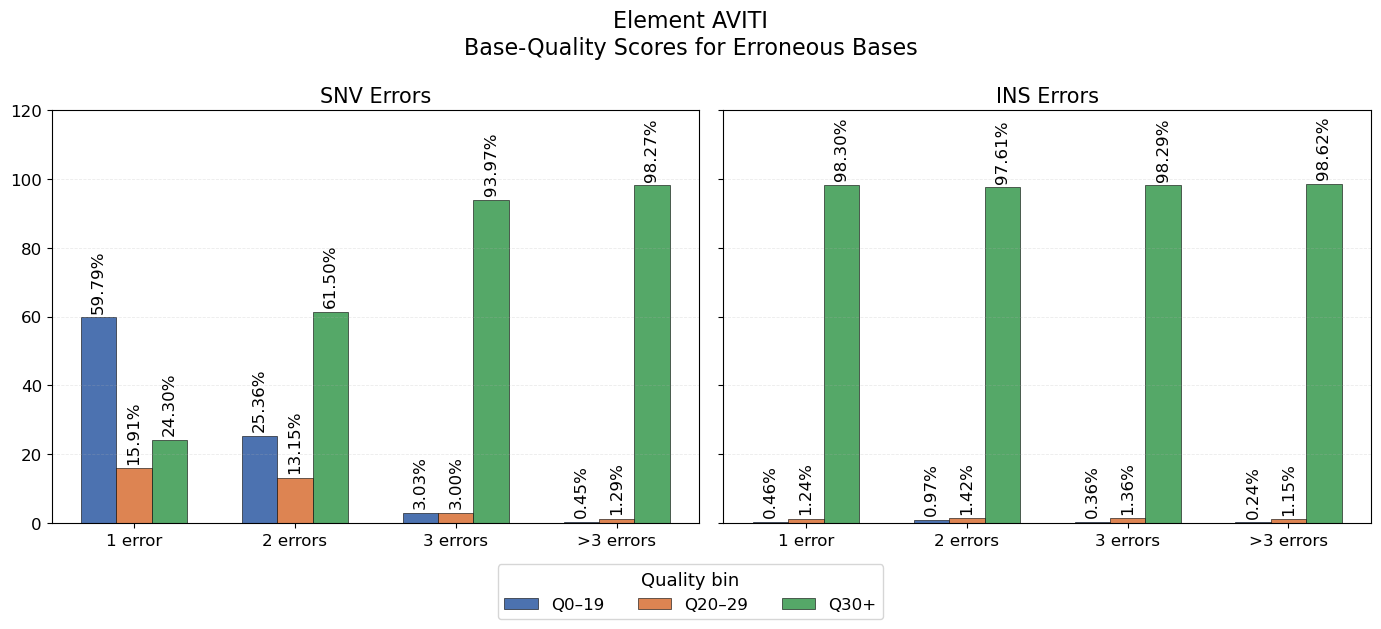

  error_class    Q0_19  Q20_29  Q30plus
0     1_error  1585964  249441  3053405
1    2_errors    53543   39699   680353
2    3_errors    18727   24804   540825
3  gt3_errors    30784   66648  3036821
  error_class  Q0_19  Q20_29  Q30plus
0     1_error    569     834    55707
1    2_errors    147     271    28863
2    3_errors     90     235    22031
3  gt3_errors    469    1744   212723


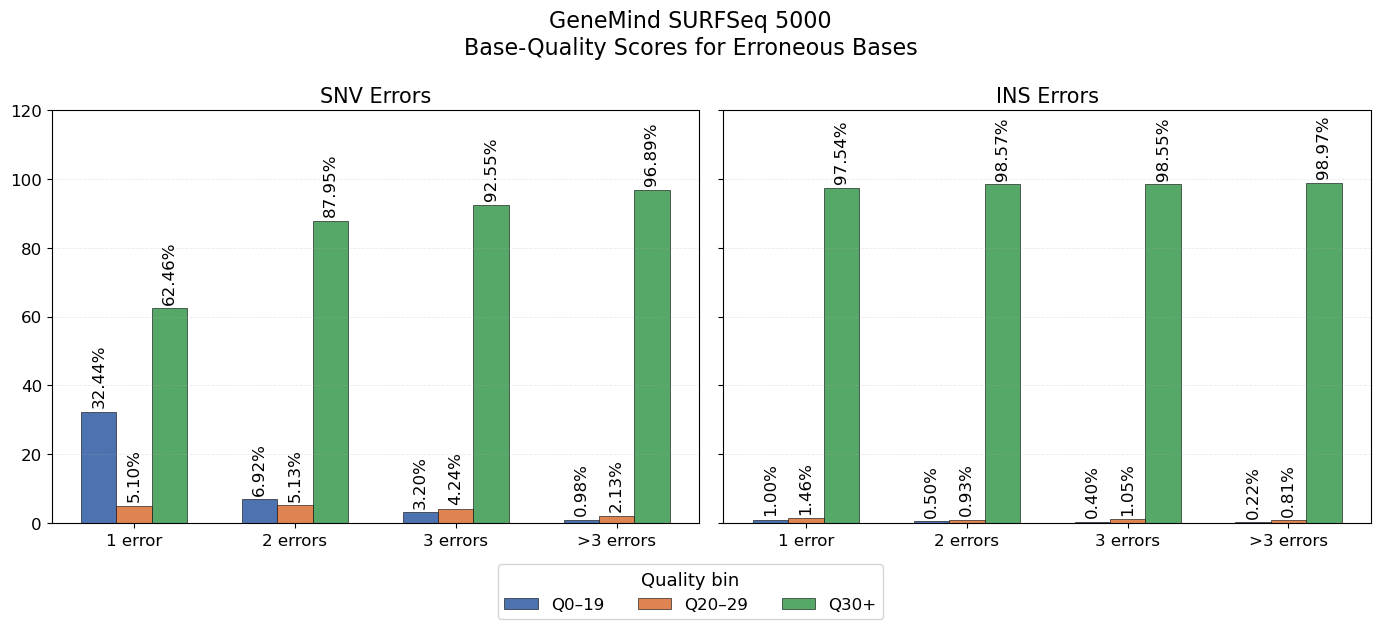

  error_class    Q0_19   Q20_29  Q30plus
0     1_error  2985633  2076919  5529794
1    2_errors    42706    74071   534388
2    3_errors     1914     9507   329685
3  gt3_errors     2567    36609  2298718
  error_class  Q0_19  Q20_29  Q30plus
0     1_error     45    1150    61823
1    2_errors    238     550    22963
2    3_errors     26     255    16120
3  gt3_errors     34    2214   170786


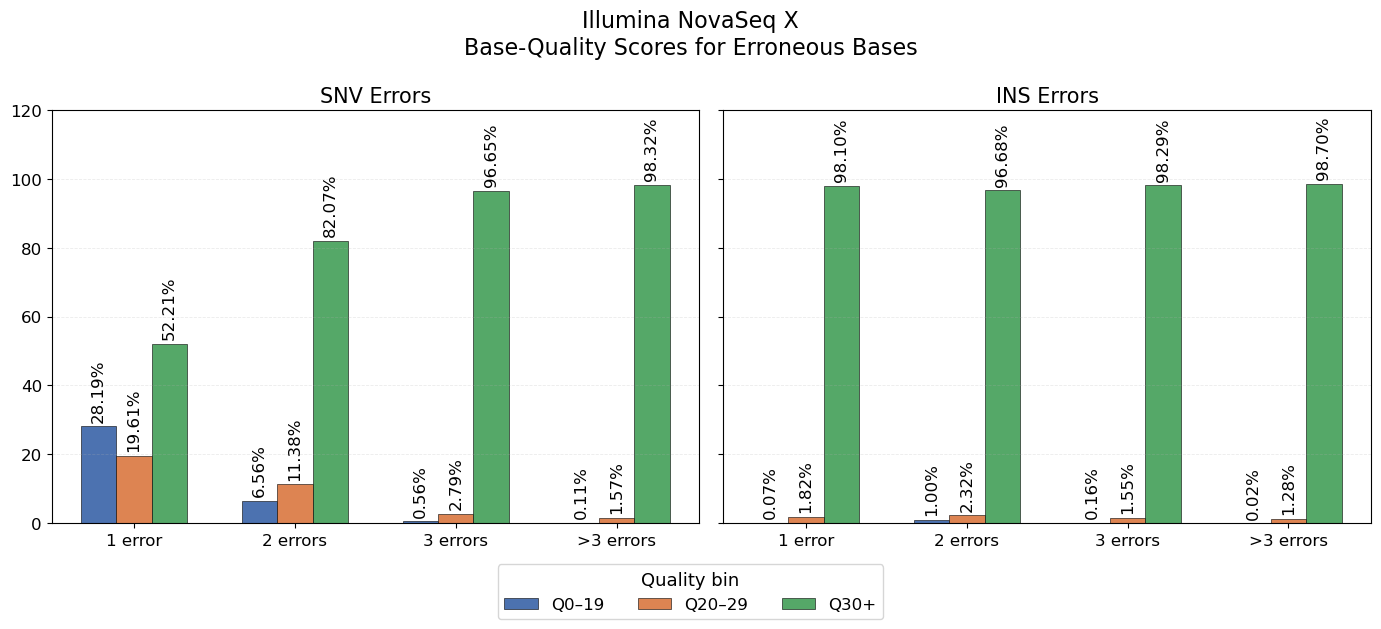

  error_class    Q0_19   Q20_29  Q30plus
0     1_error  5149003  2290619  7106772
1    2_errors   189747   106831   768413
2    3_errors    12722     9493   497964
3  gt3_errors    10455    17026  3554522
  error_class  Q0_19  Q20_29  Q30plus
0     1_error    264     653   663182
1    2_errors    213     366   267507
2    3_errors     56     151    94148
3  gt3_errors    321    1110   451860


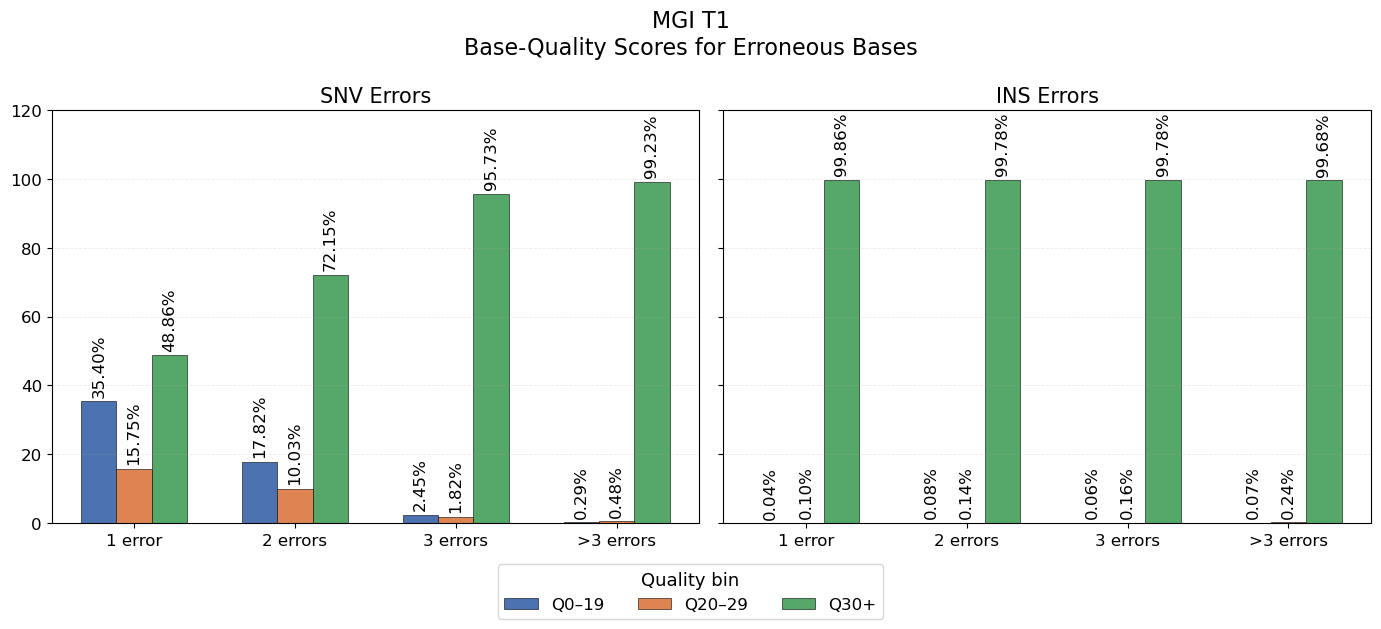

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "font.size": 13,
    "axes.titlesize": 15,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})


# ======================
# 1️⃣ LETTURA DATI
# ======================
df_paths = {
    "Element AVITI": "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/Element_WGS/RUN_4/IDENTITY_NA12878_Element_run4_GIAB_reads_Q30_up.tsv.gz.stats.base_distribution.tsv.gz",
    "GeneMind SURFSeq 5000": "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V2/SnakeMake_Sequencing_Identity/NA12878_KAPA/IDENTITY_NA12878_KAPA_reads_30_up_LogOfMeans_all.tsv.gz.stats.base_distribution.tsv.gz",
    "Illumina NovaSeq X": "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/ILLUMINA_NovaSeqX_WGS/NA12878_KAPA/IDENTITY_NA12878_NovaSeqX_KAPA_GIAB_reads_Q30_up_LogOfMeans.tsv.gz.stats.base_distribution.tsv.gz",
    "MGI T1": "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/T1/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_reads_30_up_LogOfMeans_all.tsv.gz.stats.base_distribution.tsv.gz"
}


# Bins e colori
bins = ["Q0_19", "Q20_29", "Q30plus"]
colors = {"Q0_19": "#4C72B0", "Q20_29": "#DD8452", "Q30plus": "#55A868"}
labels_pretty = {"Q0_19": "Q0–19", "Q20_29": "Q20–29", "Q30plus": "Q30+"}

# Ordine classi di errore
order = ["1_error", "2_errors", "3_errors", "gt3_errors"]
error_label_en = {
    "1_error": "1 error",
    "2_errors": "2 errors",
    "3_errors": "3 errors",
    "gt3_errors": ">3 errors"
}


# ======================
# 2️⃣ LOOP SU PIATTAFORME
# ======================
for name, df_path in df_paths.items():

    df = pd.read_csv(df_path, sep="\t", compression="gzip")

    # Filtra SOLO basi errate e rimuove 0 errors
    df = df[(df["correct_or_error"] == "error") & (df["error_class"] != "0_errors")]

    # Somma per classi
    df_grouped = df.groupby("error_class", as_index=False).sum()
    df_grouped["error_class"] = pd.Categorical(df_grouped["error_class"], categories=order, ordered=True)
    df_grouped.sort_values("error_class", inplace=True)

    # Separa SNV e INDEL
    df_snv = df_grouped[["error_class", "SNV_Q0_19", "SNV_Q20_29", "SNV_Q30plus"]].copy()
    df_indel = df_grouped[["error_class", "INDEL_Q0_19", "INDEL_Q20_29", "INDEL_Q30plus"]].copy()

    df_snv.columns = ["error_class"] + bins
    df_indel.columns = ["error_class"] + bins
    print(df_snv)
    print(df_indel)

    # Normalizza in percentuale per riga
    for d in (df_snv, df_indel):
        total = d[bins].sum(axis=1).replace(0, 1)
        d[bins] = d[bins].div(total, axis=0) * 100

    # ======================
    # 3️⃣ GRAFICO → SNV ⬅️ | ➡️ INDEL
    # ======================
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    titles = ["SNV Errors", "INS Errors"]
    datasets = [df_snv, df_indel]

    for ax, title, data in zip(axes, titles, datasets):

        x = np.arange(len(data))
        bar_width = 0.22
        offsets = np.array([-bar_width, 0.0, bar_width])

        for i, b in enumerate(bins):
            vals = data[b].values
            bars = ax.bar(x + offsets[i], vals, width=bar_width,
                          color=colors[b], label=labels_pretty[b],
                          edgecolor="black", linewidth=0.4)

            # Etichette sopra le barre
            for bar, val in zip(bars, vals):
                ax.text(bar.get_x() + bar.get_width()/2,
                        bar.get_height() + 1.2,
                        f"{val:.2f}%",
                        ha="center", va="bottom", fontsize=12, rotation=90)

        ax.set_xticks(x)
        ax.set_xticklabels([error_label_en[e] for e in data["error_class"]])
        ax.set_title(title)

        ax.set_ylim(0, 120)
        ax.grid(alpha=0.25, axis="y", linestyle="--", linewidth=0.6)

    fig.suptitle(f"{name}\nBase-Quality Scores for Erroneous Bases", fontsize=16)

    # Legenda unica centrata sotto
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title="Quality bin", ncol=3,
               loc="lower center", bbox_to_anchor=(0.5, -0.05))

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()


➡ UpSet: 1_error


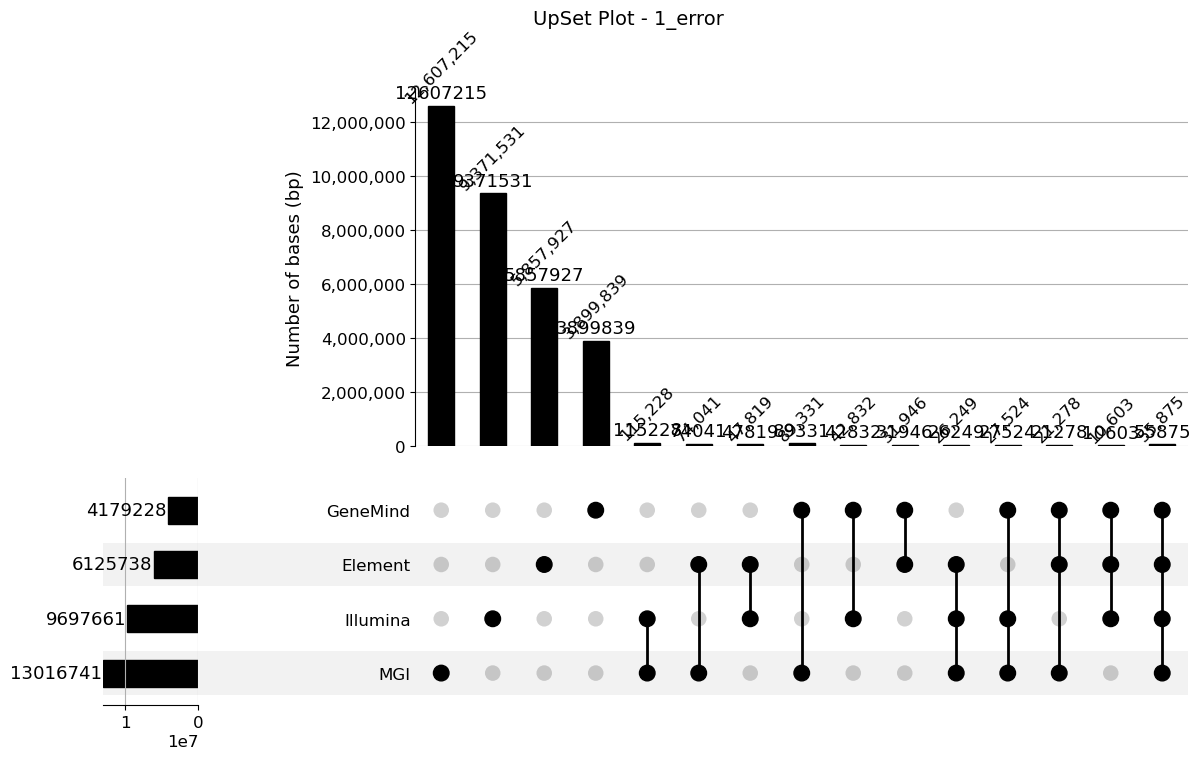

➡ UpSet: 2_errors


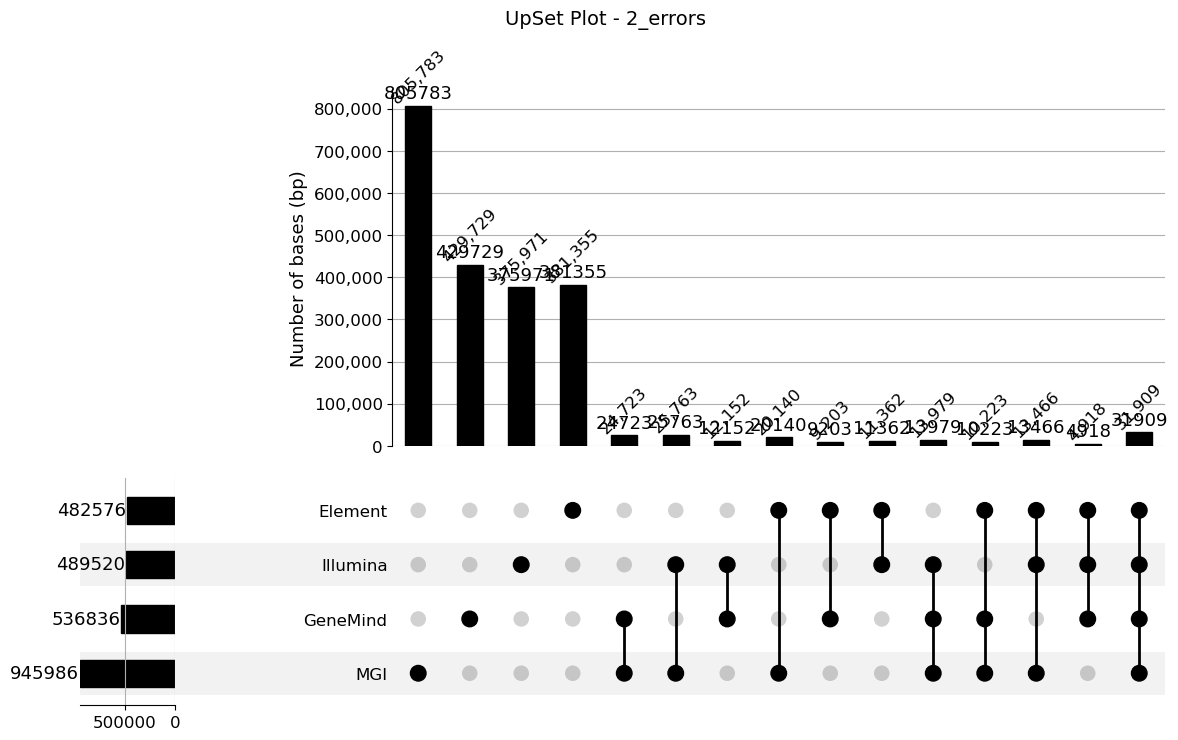

➡ UpSet: 3_errors


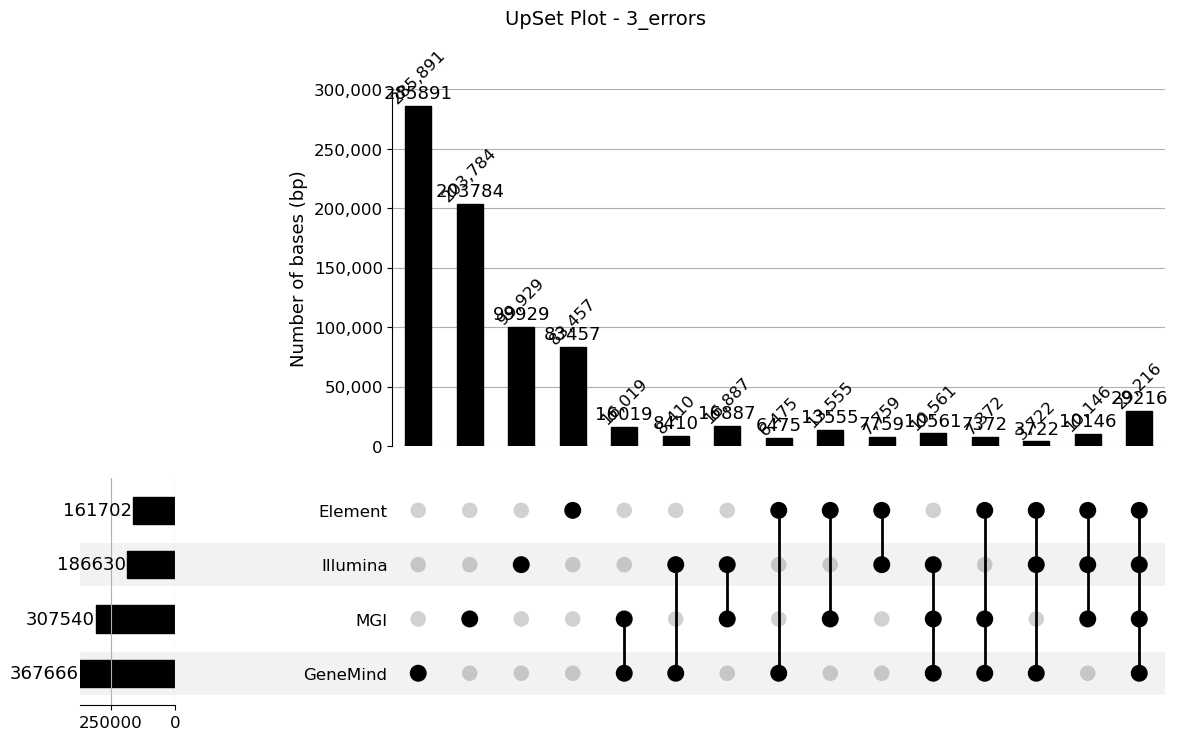

➡ UpSet: gt3_errors


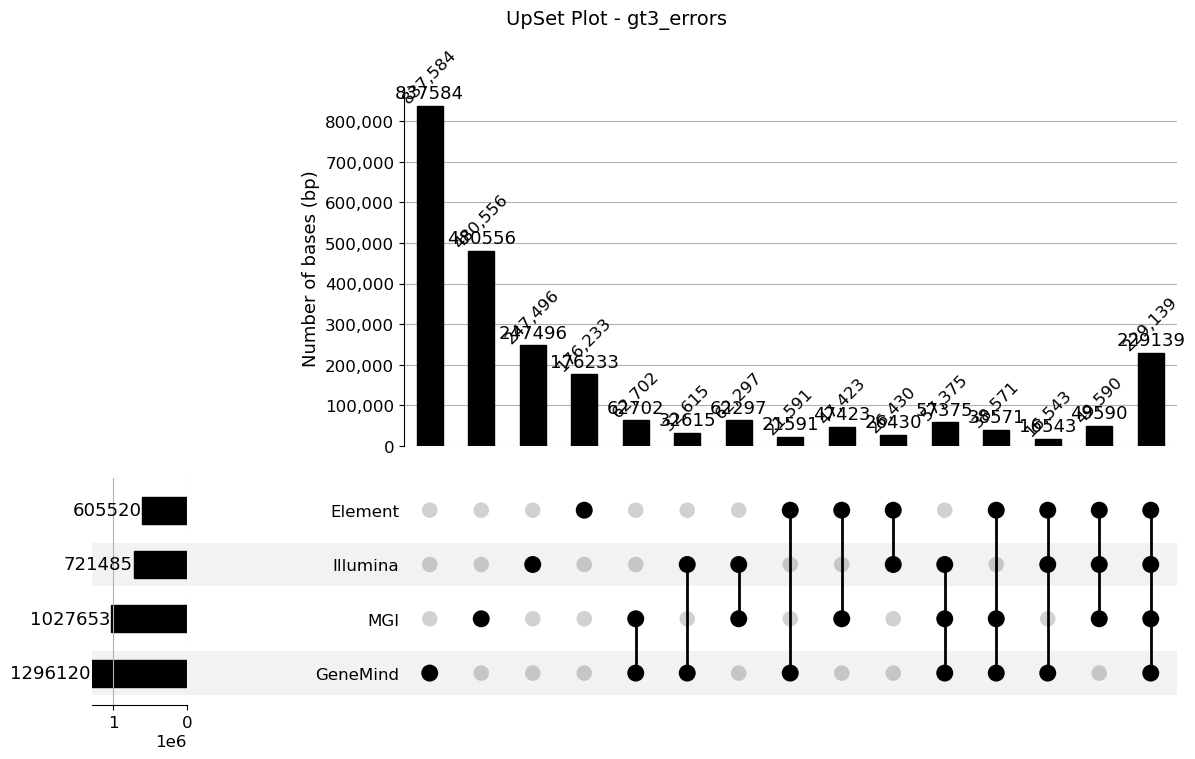

In [30]:
#!/usr/bin/env python3
import os
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators
from matplotlib.ticker import FuncFormatter

# === CONFIG directories ===
input_dirs = {
    "GeneMind": "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/GeneMind_WGS/V2/SnakeMake_Sequencing_Identity/NA12878_KAPA/IDENTITY_NA12878_KAPA_reads_30_up_LogOfMeans_all.tsv.gz.stats.base_distribution_BED",
    "Illumina": "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/ILLUMINA_NovaSeqX_WGS/NA12878_KAPA/IDENTITY_NA12878_NovaSeqX_KAPA_GIAB_reads_Q30_up_LogOfMeans.tsv.gz.stats.base_distribution_BED",
    "MGI": "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/MGI/T1/SnakeMake_Sequencing_Identity_results/NA12878_KAPA/IDENTITY_NA12878_KAPA_reads_30_up_LogOfMeans_all.tsv.gz.stats.base_distribution_BED",
    "Element": "/home/comparazione_kit/calcolo_identità_sequenze_Sequenziatori/Element_WGS/RUN_4/IDENTITY_NA12878_Element_run4_GIAB_reads_Q30_up.tsv.gz.stats.base_distribution_BED"
}

error_classes = ["1_error", "2_errors", "3_errors", "gt3_errors"]
outdir = "UPSET_ERROR_ANALYSIS"
os.makedirs(outdir, exist_ok=True)


def load_bed(path):
    coords = set()
    with open(path) as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            chrom, start, end = line.split("\t")
            coords.add(f"{chrom}:{start}-{end}")
    return coords


for err in error_classes:
    print(f"➡ UpSet: {err}")

    data = {}
    for plat, directory in input_dirs.items():
        bedfile = os.path.join(directory, f"{err}.bed")
        if not os.path.exists(bedfile):
            print(f"ERROR: missing file → {bedfile}")
            exit(1)
        data[plat] = load_bed(bedfile)

    # Create boolean DataFrame for UpSet (index = positions, columns = platforms)
    all_positions = sorted(set.union(*data.values()))
    df = pd.DataFrame(
        {plat: [pos in data[plat] for pos in all_positions] for plat in data.keys()},
        index=all_positions
    ).astype(bool)

    # Convert boolean indicator DataFrame into the format expected by UpSet
    upset_data = from_indicators(df)

    fig = plt.figure(figsize=(12, 6))
    upset = UpSet(upset_data, subset_size='count', show_counts=True) ### mettere a false per togliere i numeri doppioni
    upset.plot(fig=fig)
    plt.suptitle(f"UpSet Plot - {err}", fontsize=14)

    # Rotazione e formattazione delle etichette sopra le barre
    ax = plt.gca()
    ax.set_ylabel("Number of bases (bp)", fontsize=13)
    for bar in ax.containers:
        for rect in bar:
            height = rect.get_height()
            if height > 0:
                ax.text(
                    rect.get_x() + rect.get_width() / 2,
                    height,
                    f"{int(height):,}".replace(".", ","),
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    rotation=45
                )

    # Formattazione asse y con separatore migliaia
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'.replace('.', ',')))
    fig.set_size_inches(14, 8)

    outfile = os.path.join(outdir, f"{err}_UpSet.png")
    plt.show()
    plt.close()
